## Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

## Import fashion mnist dataset

In [2]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

## Pre process the data

In [4]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

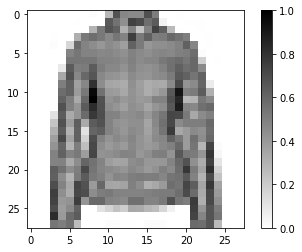

In [5]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Define and train the model

In [6]:
cnn_model = tf.keras.Sequential([
                                 tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.keras.activations.relu, input_shape=(28, 28, 1)),
                                 tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
                                 tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.keras.activations.relu),
                                 tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
                                 tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid)
])

In [7]:
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
    )

In [8]:
BATCH_SIZE = 32
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [9]:
history = cnn_model.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE),
    verbose=1
    )

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4234 - accuracy: 0.8468
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2760 - accuracy: 0.9012
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2299 - accuracy: 0.9162
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1944 - accuracy: 0.9273
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1680 - accuracy: 0.9376
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1467 - accuracy: 0.9450
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1283 - accuracy: 0.9527
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1099 - accuracy: 0.9595
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0944 - accuracy: 0.9642
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.083

In [10]:
test_loss, test_accuracy = cnn_model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.2745 - accuracy: 0.9168
Accuracy on test dataset: 0.9168000221252441
